In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# load dataset
df= pd.read_csv('sentiment_reviews_5000.csv')

In [5]:
df.head()

,review,label
0,The product exceeded my expectations. It is du...,positive
1,Very poor quality and not worth the price. I w...,negative
2,The product exceeded my expectations. It is du...,positive
3,I am disappointed with this product. It did no...,negative
4,This is a great purchase. The performance is r...,positive


In [6]:
df.shape

(5000, 2)

In [7]:
# change the review dtype to string and mapping of label feature
df['review']= df['review'].astype(str)
df['label']= df['label'].map({'negative':0, 'positive':1})

In [8]:
# store review and label with variables names
texts= df['review'].values
labels= df['label'].values

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
# set top 10000 words to considered with highest frequency
tokenizer= Tokenizer(num_words=10000)

In [11]:
tokenizer.fit_on_texts(texts)

In [12]:
sequence= tokenizer.texts_to_sequences(texts)

In [13]:
texts[0]

'The product exceeded my expectations. It is durable, efficient, and worth the money.'

In [14]:
sequence[0]  

[3, 8, 32, 13, 18, 5, 6, 33, 34, 1, 16, 3, 35]

In [15]:
from sklearn.model_selection import train_test_split  

In [16]:
x_train, x_test, y_train, y_test= train_test_split(sequence, labels, test_size=0.2, random_state=42)  

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# applying pad sequence with 150 maximum length of review
x_train= pad_sequences(x_train, maxlen=150)
x_test= pad_sequences(x_test, maxlen=150)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

In [21]:
model= Sequential()

In [22]:
# create model architecture
model.add(Embedding(input_dim=10000, output_dim=32, input_length=150))

model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))

C:\Users\Pawanpreet Kaur\anaconda3\envs\Tensor_Flow\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# training of model
history=model.fit(x_train, y_train,
          epochs=50, 
          batch_size=32,
          validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9953 - loss: 0.0810 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 1.0000 - loss: 9.0813e-04 - val_accuracy: 1.0000 - val_loss: 7.2824e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 1.0000 - loss: 6.0903e-04 - val_accuracy: 1.0000 - val_loss: 5.1206e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 1.0000 - loss: 4.4114e-04 - val_accuracy: 1.0000 - val_loss: 3.8189e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 1.0000 - loss: 3.3580e-04 - val_accuracy: 1.0000 - val_loss: 2.9706e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy:

In [25]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 5.6144e-06


[5.614367182715796e-06, 1.0]

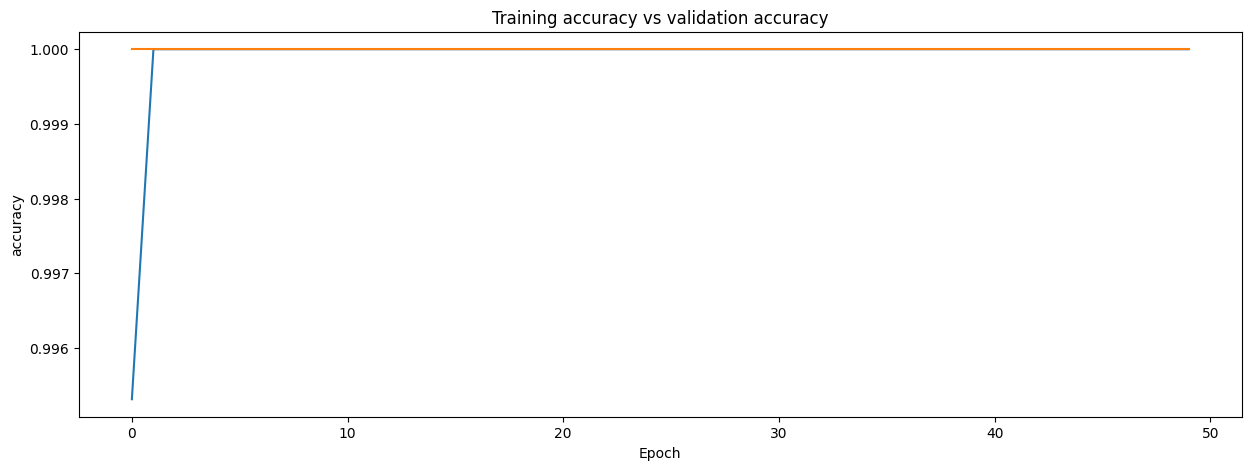

In [26]:
# visuals of training accuracy vs validation accuracy
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training accuracy vs validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
# predictions 
def predict(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=200)
    pred = model.predict(padded)[0][0]
    return "positive" if pred >= 0.5 else "negative"

In [28]:
print(predict('The product failed to meet my expectations and caused frustration.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
negative


In [29]:
print(predict('This is a great purchase. The performance is reliable and I would recommend it to others.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
positive


In [30]:
print(predict('I had a wonderful experience using this. Everything functions smoothly and efficiently.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
positive


In [31]:
print(predict('it was a good product'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
positive


In [32]:
print(predict('this product failed meet my expectations'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
positive


In [33]:
# save model 
model.save('review_rnn.keras')

In [34]:
import pickle

In [35]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)